In [ ]:
from pathlib import Path
from typing import BinaryIO
import re

import numpy as np
import matplotlib.pyplot as plt

from topostats.filters import Filters

from AFMReader.io import (
    read_uint8,
    read_int8,
    read_int16,
    read_int32,
    read_uint32,
    read_hex_u32,
    read_float,
    read_bool,
    read_double,
    read_ascii,
    read_null_separated_utf8,
    read_char,
    read_null_terminated_string,
    skip_bytes,
)

In [ ]:
def read_raw_bytes(open_file: BinaryIO, length_bytes: int) -> bytes:
    return open_file.read(length_bytes)

In [ ]:
filepath = Path(
    "/Users/sylvi/topo_data/file_format_stp/2021_06_18_RNA 1.5 SC 2 nM_Tris 5 mM_ MgCl2 7.5 mM_0000.f.dy.stp"
)
assert filepath.exists()

# Notes

- Header has size marked at the start and the end is also marked with [Header end]
- Reading floats doesn't seem to work but shows a pattern. 

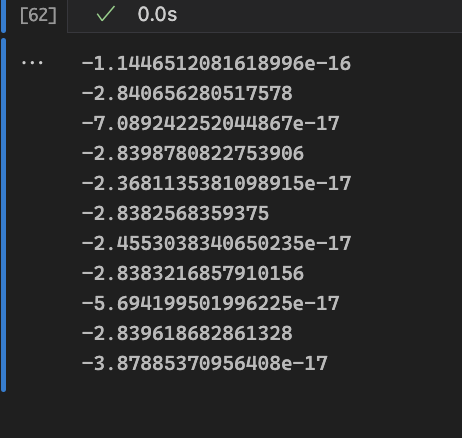

In [ ]:
# Try to read the file
with open(filepath, "rb") as file:
    # Find the number of bytes in the header by looking for "Image header size: <number"
    beginning_message = str(read_raw_bytes(file, 150))

    header_size_match = re.search(r"Image header size: (\d+)", beginning_message)
    assert header_size_match is not None
    header_size = int(header_size_match.group(1))

    # Return to start of the file
    file.seek(0)

    # Skip the header
    header = read_raw_bytes(file, header_size)

    # Print header, splitting by newlines
    split_header = header.split(b"\r\n")
    for line in split_header:
        print(line)

    header_string = str(header)